This notebook takes starburst99 models of a stellar population to evaluate at what delay time would our SNe need to occur to account for the excess SN we see in our observations.
It also plots the lowest mass of SN vs time for the discussion figure.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# file header info
""" MODEL DESIGNATION: SNbayesian          
RESULTS FOR THE SUPERNOVA RATE
ALL SUPERNOVAE               TYPE IB SUPERNOVAE               ALL SUPERNOVAE           STARS + SUPERNOVAE"""

''' MODEL DESIGNATION: SNtimeline          
RESULTS FOR THE NUMBER OF IONIZING PHOTONS

   TIME            H I              HE I            HE II         LOG L
              [s^-1]  % OF L   [s^-1]  % OF L   [s^-1]  % OF L   [ERG/S]'''

# starburst99 files
starburst_file = "../Data/output/SNbay.csv"
ha_file = "../Data/output/SNtimeline.quanta1"

# our observed excess value
excess = 0.12

In [2]:
df = pd.read_csv(starburst_file)
df

,Unnamed: 0,0.100E+05,-30.000,-30.000.1,-30.000.2,-30.000.3,-30.000.4,-30.000.5,0.0,0.0.1,-30.000.6,-30.000.7
0,NaN,110000.0,-30.0,-30.0,-30.000,-30.0,-30.0,-30.000,0.0,0.0,-30.0,-30.0
1,NaN,210000.0,-30.0,-30.0,-30.000,-30.0,-30.0,-30.000,0.0,0.0,-30.0,-30.0
2,NaN,310000.0,-30.0,-30.0,-30.000,-30.0,-30.0,-30.000,0.0,0.0,-30.0,-30.0
3,NaN,410000.0,-30.0,-30.0,-30.000,-30.0,-30.0,-30.000,0.0,0.0,-30.0,-30.0
4,NaN,510000.0,-30.0,-30.0,-30.000,-30.0,-30.0,-30.000,0.0,0.0,-30.0,-30.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,99500000.0,-30.0,-30.0,55.025,-30.0,-30.0,54.139,0.0,0.0,-30.0,-30.0
995,NaN,99600000.0,-30.0,-30.0,55.025,-30.0,-30.0,54.139,0.0,0.0,-30.0,-30.0
996,NaN,99700000.0,-30.0,-30.0,55.025,-30.0,-30.0,54.139,0.0,0.0,-30.0,-30.0
997,NaN,99800000.0,-30.0,-30.0,55.025,-30.0,-30.0,54.139,0.0,0.0,-30.0,-30.0


In [3]:
df_ha = pd.read_csv(ha_file)
df_ha

,Unnamed: 0,.10000E+05,52.615,-0.361,51.889,-0.902,48.660,-3.874,42.496
0,NaN,110000.0,52.612,-0.367,51.885,-0.909,48.635,-3.900,42.498
1,NaN,210000.0,52.612,-0.370,51.884,-0.914,48.620,-3.919,42.501
2,NaN,310000.0,52.613,-0.372,51.885,-0.917,48.612,-3.930,42.504
3,NaN,410000.0,52.614,-0.376,51.884,-0.922,48.598,-3.947,42.508
4,NaN,510000.0,52.615,-0.379,51.884,-0.926,48.581,-3.968,42.511
...,...,...,...,...,...,...,...,...,...
994,NaN,99510000.0,44.879,-6.308,37.718,-13.230,-10.000,-50.556,40.556
995,NaN,99610000.0,44.871,-6.317,37.711,-13.237,-10.000,-50.556,40.556
996,NaN,99710000.0,44.870,-6.317,37.710,-13.237,-10.000,-50.555,40.555
997,NaN,99810000.0,44.872,-6.314,37.712,-13.235,-10.000,-50.555,40.555


In [4]:
time = df["0.100E+05"]
mass = df["0.0.1"]
rate = df["-30.000"] 

def numSNe(rate):
    number = (10**rate) * (0.1E6)
    return(number)


In [5]:
# make cdfs of sne and h-alpha emission
sumNumber = np.cumsum(numSNe(rate))/np.sum(numSNe(rate))
time = time/(10**6)

haArr = 10**df_ha['52.615']
# HalphaFrac =  haArr/np.sum(haArr)
CDFHa = np.cumsum(haArr)/np.sum(haArr)

maxHa = np.max(haArr)
HalphaScale =  haArr/maxHa


In [6]:
# evaluate time and mass for excess
def closest(lst, K):
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

def time_mass(sn_cdf, excess):    
    idx = int(np.where(sn_cdf == closest(sn_cdf,excess))[0])
    return(time[idx],mass[idx],idx)

In [7]:
time_ex, mass_ex, idx = time_mass(sumNumber,excess)
print(time_ex, mass_ex)

5.51 34.4


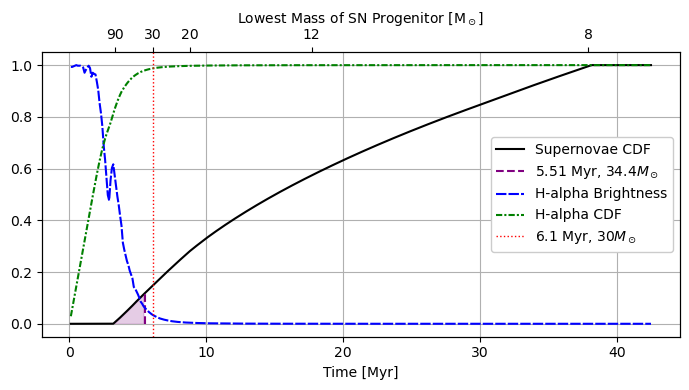

In [8]:
# plot lowest mass SN progenitor vs time
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
ax2 = ax.twiny()
ax.plot(time[0:425], sumNumber[0:425], color="k", label="Supernovae CDF")
ax.plot([time[idx],time[idx]],[0.0,0.12], color='purple',linestyle="--", label=r"5.51 Myr, $34.4 M_\odot$")

ax.plot(time[0:425],HalphaScale[0:425], linestyle=(0,(5,1)),label="H-alpha Brightness", color = "blue")
ax.plot(time[0:425],CDFHa[0:425], linestyle=(0,(3,1,1,1)), label="H-alpha CDF", color = "green")


ax.set_xlabel("Time [Myr]")
# ax.set_ylabel("Fraction")
ax.axvline(x=time[60], linewidth=1, color='red', linestyle=':',label=r"6.1 Myr, $30M_\odot$")

ax.grid()
ax.fill_between(time[0:idx],sumNumber[0:idx], alpha = 0.2, color='purple')
ax.legend(loc='best', facecolor='white',framealpha=1.0)
# secax = ax.secondary_xaxis('top', functions=(time2mass, mass2time))
# secax.set_xlabel('Mass [Msun]')

new_tick_locations = np.array([3.31,6.11,8.81,17.7,37.9])
new_tick_labels = [90, 30,20, 12, 8]
# new_tick_locations = np.array([0,10,20,30,40])
# new_tick_labels = [mass[0], mass[99], mass[199], mass[299], mass[399]]


ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(new_tick_labels)
ax2.set_xlabel(r"Lowest Mass of SN Progenitor [M$_\odot$]")
plt.tight_layout()

plt.show()
plt.close()
fig.savefig("../Figures/SNtimescale.pdf", dpi=300)